目录

* [使用线性SVM解决线性可分问题](#使用线性SVM解决线性可分问题)
* [使用kernel-SVM解决非线性问题](#使用非线性kernel-SVM解决非线性问题)

## 使用线性SVM解决线性可分问题

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
# 准备鸢尾花数据集
iris = datasets.load_iris()

# iris.data 一共有4个特征
X = iris.data[:,[2,3]] # 只使用2个特征: petal length and petal width 以及3个类别
y = iris.target
print(X.shape, y.shape)
print('Class labels:', np.unique(y))

(150, 2) (150,)
Class labels: [0 1 2]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# standardize the features 以获得最佳性能
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
# 绘制分类决策边界：
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
     # setup marker generator and color map
     markers = ('s', 'x', 'o', '^', 'v')
     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
     cmap = ListedColormap(colors[:len(np.unique(y))])

     # plot the decision surface
     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
     Z = Z.reshape(xx1.shape)
     plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
     plt.xlim(xx1.min(), xx1.max())
     plt.ylim(xx2.min(), xx2.max())

     for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
         alpha=0.8, c=colors[idx],
         marker=markers[idx], label=cl,
         edgecolor='black')

     # highlight test samples
     if test_idx:
         # plot all samples
         X_test, y_test = X[test_idx, :], y[test_idx]
         plt.scatter(X_test[:, 0], X_test[:, 1],
                     c='', edgecolor='black', alpha=1.0,
                     linewidth=1, marker='o',
                     s=100, label='test set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


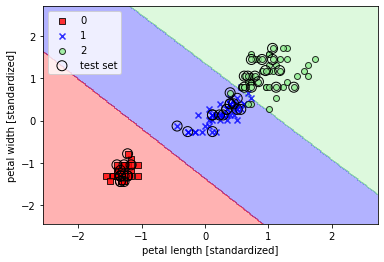

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


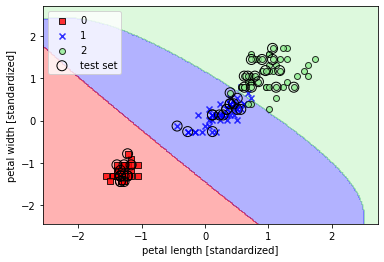

In [13]:
# 实现rbf核以及相对较小的\gamma 值，能得到更加soft的决策边界
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## 使用非线性kernel-SVM解决非线性问题

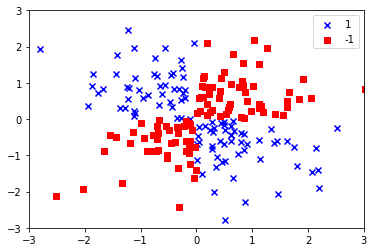

In [15]:
# 创建一个简单的数据集，它具有XOR门的形式
# 其中100个样本将被分配给类标签1，100个样本将被分配给类标签-1
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

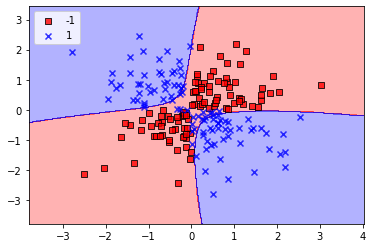

In [12]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()